# Lab 3 - praca z atrybutami nienumerycznymi oraz skalowanie i transformacja wartości

Kodowanie zmiennych kategorialnych na różne sposoby może znacząco wpływać na skuteczność modeli uczenia maszynowego. Przyjrzyjmy się dwóm popularnym metodom kodowania: **kodowanie etykietowe (Label Encoding)** oraz **One-Hot Encoding**.

### Kodowanie etykietowe (Label Encoding)
W tej metodzie każda kategoria jest mapowana na liczbę całkowitą. Na przykład dla zmiennej "kolor" z wartościami {czerwony, niebieski, zielony} można przypisać:
- czerwony = 0
- niebieski = 1
- zielony = 2

Jest to prosta metoda, ale niesie pewne zagrożenia, szczególnie dla modeli, które traktują zmienne numeryczne jako dane o porządku lub metryce.

**Kiedy działa lepiej:**
- Sprawdza się, gdy zmienna kategorialna rzeczywiście ma jakiś naturalny porządek (np. mały, średni, duży). 
- **Modele drzew decyzyjnych** (jak Random Forest, Gradient Boosting) dobrze sobie radzą z kodowaniem etykietowym, ponieważ są odporne na różnicę w liczbach między kategoriami.

**Główne problemy:**
- W modelach liniowych, sieciach neuronowych, SVM oraz k-nn, model może interpretować różnice liczbowe jako istotne, co może prowadzić do błędnych wniosków. Na przykład, wartość "zielony" = 2 może być traktowana jako dwukrotnie "większa" od wartości "czerwony" = 0, co jest nieprawidłowe, ponieważ kategorie nie mają porządku.

### One-Hot Encoding
W tej metodzie każda kategoria jest reprezentowana jako wektor binarny. Dla przykładu:
- czerwony = [1, 0, 0]
- niebieski = [0, 1, 0]
- zielony = [0, 0, 1]

Każda kategoria jest reprezentowana przez osobną kolumnę, a w odpowiedniej kolumnie jest wartość 1, natomiast w pozostałych kolumnach – 0.

**Kiedy działa lepiej:**
- **Modele liniowe**, sieci neuronowe oraz algorytmy oparte na odległościach, takie jak k-NN i SVM, preferują One-Hot Encoding, ponieważ zmienne binarne eliminują problem nieprawidłowego odczytu różnic liczbowych między kategoriami. Każda kategoria jest traktowana równorzędnie i nie tworzy relacji porządkowych.
- Może lepiej działać, gdy masz do czynienia z dużą liczbą kategorii, które nie są uporządkowane.

**Główne problemy:**
- Zwiększa liczbę cech w danych. Jeśli mamy zmienną z wieloma kategoriami, np. 1000 różnych wartości, One-Hot Encoding może znacząco zwiększyć rozmiar macierzy cech, co prowadzi do większego zużycia pamięci i spowolnienia obliczeń.

### Podsumowanie
1. **Kodowanie etykietowe** jest prostsze i bardziej efektywne dla modeli drzewiastych, które nie mają problemu z interpretacją wartości liczbowych.
2. **One-Hot Encoding** jest bardziej odpowiednie dla modeli liniowych, sieci neuronowych i algorytmów, które wymagają niezależnych, równorzędnych cech.

Wybór odpowiedniej metody kodowania zależy od modelu, którego używasz, oraz charakterystyki danych.

## Dane tekstowe

W zbiorach danych często pojawiają się dane tekstowe mające charakter kategorialny. Z uwagi na fakt, że algorytmy uczenia maszynowego operują tylko i wyłącznie na wartościach numerycznych, dane tekstowe wymagają przetworzenia do postaci liczbowej. W takiej sytuacji z pomocą przychodzi klasa `OrdinalEncoder` zawarta w module `preprocessing` biblioteki `Scikit-learn`.

In [39]:
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)['frame']

In [31]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.'
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.'
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.'


Jak widzimy w powyższej ramce danych znajdują się 4 kolumny z wartościami nienumerycznymi:
- protocol_type,
- service,
- flag,
- labels.

Spróbujmy zatem dopasować nasz Encoder do danych i przetransformowac dane, tak jak robiliśmy to w trakcie czyszczenia danych.

Interfejs biblioteki `Scikit-learn` umożliwia alternatywne wywoływanie metod `fit` oraz `transform`, które występują po sobie w postaci `fit_transform`.

In [3]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
labels = encoder.fit_transform(data[['protocol_type']])

In [4]:
labels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Uzyskane wartości numeryczne przypisane poszczególnym wartościom tekstowym znalazły się w obiekcie `labels`. Uzyskane wartości można z powodzeniem wykorzystać w ramce danych. Klucz, według którego wartości tekstowe były transformowane do wartości numerycznych znajduje się w atrybucie `categories_` obiektu `encoder`, gdzie pozycja tablicy odpowiada przypisanej liczbie.

In [5]:
encoder.categories_

[array([b'icmp', b'tcp', b'udp'], dtype=object)]

Algorytmy uczące się posiadają zdolność do rozpoznawania wzorców definiowalnych przez liczby. W związku z tym niektóre z nich mogą bardziej istotnie traktować wartość liczbową przypisaną protokołowi UDP niż protokołowi ICMP. W związku z tym warto rozważyć zastosowanie tzw. **kodowanie gorącojedynkowe**, które polega na utworzeniu wektora rzadkiego o rozmiarze *n* (n = liczba różnych wartości tekstowych) z jedną jedynką na pozycji wskazującej daną kategorię. W tym celu należy wykorzystać klasę `OneHotEncoder`.

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
protocol_onehot = encoder.fit_transform(data[['protocol_type']])

Wynikiem jest obiekt zawierający macierz rzadką, co niesie korzyść w postaci oszczędności pamięci. Za pomocą metody `toarray()` można jednak dokonać transformacji do postaci tablicy numpy.

In [7]:
protocol_onehot

<494021x3 sparse matrix of type '<class 'numpy.float64'>'
	with 494021 stored elements in Compressed Sparse Row format>

In [8]:
protocol_onehot.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Zastąpienie oryginalnego atrybutu wersją gorącojedynkową niesie za sobą zwiększenie ogólnej liczby atrybutów w ramce. Na każdą kategorię powstaje w takiej sytuacji jeden atrybut. Poniżej zastosowano metodę `get_feature_names_out()`, która zawiera pierwotne wartości kolumny i podane są w kolejności w jakiej są uporządkowane w kolumnach w nowej wersji ramki.

In [9]:
import pandas as pd

onehot_df = pd.DataFrame(
    protocol_onehot.toarray(),
    columns=encoder.get_feature_names_out(),
    index=data.index
    )

In [10]:
data = data.join(onehot_df)

In [11]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,protocol_type_b'icmp',protocol_type_b'tcp',protocol_type_b'udp'
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.',0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.',0.0,1.0,0.0


Oczywiście powinniśmy naszą ramkę dodatkowo zmodyfikować przed użyciem jej w modelu - należałoby usunąć pierwotną kolumnę, o ile jesteśmy zadowoleni z wyniku. Warto używać `deepcopy` w celu skopiowania pierwotnej ramki danych i dopiero na tej kompii dokonowyać zmian, aby przez przypadek nie utracich ważnych dla nas danych.

## Skalowanie i transformacja atrybutów liczbowych

Wiele algorytmów uczących się źle radzi sobie podczas pracy z atrybutami numerycznymi, których wartości mieszczą się w różnych skalach (np. 0-1 oraz 4-290). Istnieją jednak metody sprawnie umożliwiające transformację wartości w atrybutach do ujednoliconego zakresu.

Jednym z najpopularniejszych podejść do skalowania atrybutów liczbowych jest normalizacja (skalowanie min-madata['MedInc']), które polega na umieszczeniu wszystkich wartości w wyznaczonym zakresie (np. 0-1): $data['MedInc']' = \frac{x - min(x)}{max(x) - min(x)}$

W bibliotece `Scikit-learn` do normalizacji służy klasa `MinMaxScaler` zawarta w module `preprocessing`, gdzie można wskazać oczekiwany zakres. Tutaj również zasotosujemy metodę `fit_transform()`.

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
src_bytes_scaled = scaler.fit_transform(data[['src_bytes']])

In [41]:
src_bytes_scaled

array([[-0.99999948],
       [-0.99999931],
       [-0.99999932],
       ...,
       [-0.99999941],
       [-0.99999916],
       [-0.99999937]])

In [42]:
src_bytes_scaled.max(), src_bytes_scaled.min()

(0.9999999999999998, -1.0)

Standaryzacja to proces polegający na wyśrodkowaniu danych oraz zachowaniu wskazanych parametrów dotyczących rozrzutu wartości: $x' = \frac{x - u}{s}$, gdzie $u$ - średnia arytmetyczna, $s$ - odchylenie standardowe. W bibliotece `Scikit-learn` do standaryzacji służy klasa `StandardScaler` zawarta w module `preprocessing`.

`StandardScaler` standaryzuje dane, przekształcając je tak, aby miały *średnią* = 0 i *odchylenie standardowe* = 1. Oznacza to, że wartości cech są przeskalowane w oparciu o ich rozkład, bez ustalania minimalnych i maksymalnych wartości.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dst_bytes_scaled = scaler.fit_transform(data[['dst_bytes']])

In [16]:
dst_bytes_scaled

array([[ 0.13866441],
       [-0.01157787],
       [ 0.01417881],
       ...,
       [ 0.01003232],
       [ 0.01003232],
       [ 0.01106138]])

Gdzie i kiedy stosować normalizację i standaryzację? Zwykle metody dopasowywane są eksperymentalnie. Warto mieć jednak na uwadze, że stadaryzacja jest czuła na wartości odstające, co może wpływać na różnice w zakresie wartości atrybutów. Można jednak pokusić sie o porównanie:

### 1. **`StandardScaler`** – Standaryzacja
`StandardScaler` standaryzuje dane, przekształcając je tak, aby miały **średnią 0** i **odchylenie standardowe 1**. Oznacza to, że wartości cech są przeskalowane w oparciu o ich rozkład, bez ustalania minimalnych i maksymalnych wartości.

**Zastosowanie:**
- Przydaje się w modelach, które zakładają, że dane są rozkładane w przybliżeniu normalnie (np. modele liniowe, SVM, k-Nearest Neighbors, sieci neuronowe).
- Modele takie jak **regresja liniowa** czy **SVM** działają lepiej, gdy dane są standaryzowane, ponieważ zakładają, że cechy mają podobny rozkład.
  
**Charakterystyka:**
- Po zastosowaniu, dane mają średnią 0 i odchylenie standardowe 1.
- Przekształcenie jest symetryczne – wartości mogą przyjmować zarówno dodatnie, jak i ujemne wartości.
  
### 2. **`MinMaxScaler`** – Normalizacja
`MinMaxScaler` przekształca dane w taki sposób, aby wartości cech znajdowały się w **zakresie od 0 do 1** (lub w dowolnym innym ustalonym zakresie).

**Zastosowanie:**
- Idealny, gdy potrzebujesz znormalizować dane do określonego zakresu, na przykład do modelów opartych na **odległościach** (np. k-NN, SVM, sieci neuronowe), gdzie cechy o różnych skalach mogą zaburzać wyniki.
  
**Charakterystyka:**
- Dane zostaną przekształcone na zakres [0, 1] (lub inny zdefiniowany przez użytkownika, np. [-1, 1]).
- Wszystkie wartości są nieujemne (przy standardowym zakresie 0-1).

### Porównanie

| Cecha                     | `StandardScaler`                                  | `MinMaxScaler`                                    |
|----------------------------|---------------------------------------------------|---------------------------------------------------|
| **Zakres wartości**         | Średnia 0, odchylenie standardowe 1               | Wartości w zakresie [0, 1] (lub innym zdefiniowanym) |
| **Kiedy używać**            | Modele liniowe, SVM, sieci neuronowe              | Modele oparte na odległościach, kiedy zakres ma znaczenie |
| **Rozkład po przekształceniu** | Średnia rozkładu wynosi 0, odchylenie standardowe 1 | Wszystkie wartości mieszczą się w określonym przedziale |
| **Dopuszcza wartości ujemne** | Tak                                              | Nie (domyślnie)                                     |

### Wybór między nimi:
- **`StandardScaler`** jest używany, gdy cechy mają różne jednostki miar, a model zakłada normalny rozkład danych.
- **`MinMaxScaler`** jest preferowany, gdy cechy muszą być znormalizowane do określonego zakresu, np. do użytku w sieciach neuronowych, które wymagają, aby dane mieściły się w określonym przedziale (np. [0, 1] lub [-1, 1]).

## Symetria wartości numerycznych

Wróćmy zatem do znanego już nam zestawu danych, jakim jest `california housing`. Tam nie ma zmiennych kategorialnych, ale występuje inny, ciekawy problem, na który część modeli może być wyczulona.

In [17]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)['frame']

In [18]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


W pewnych przypadkach histogramy atrybutów numerycznych potrafią być asymetryczne.

<Axes: >

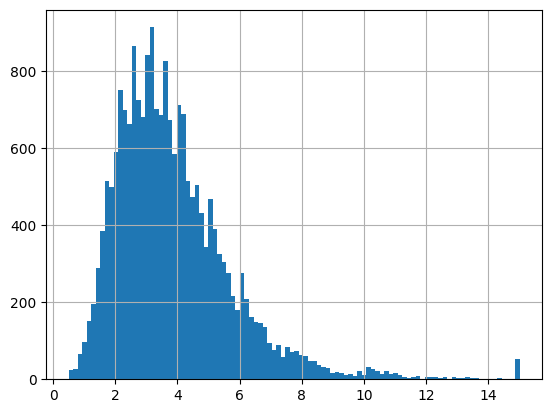

In [19]:
data['MedInc'].hist(bins=100)

Powyższy histogram jest prawoskośny, co oznacza że jego asymetria jest spowodowana nasileniem występowania wartości występujących po lewej stronie histogramu. Analogicznie wygląda sytuacja w przypadku lewoskośności. Rozwiązaniem tego problemu może być zastosowanie skali logarytmicznej lub pierwiastkowej. Zobaczmy jak następujący wykres by wyglądał dla danych w skali pierwiastkowej:

In [20]:
import numpy as np

<Axes: >

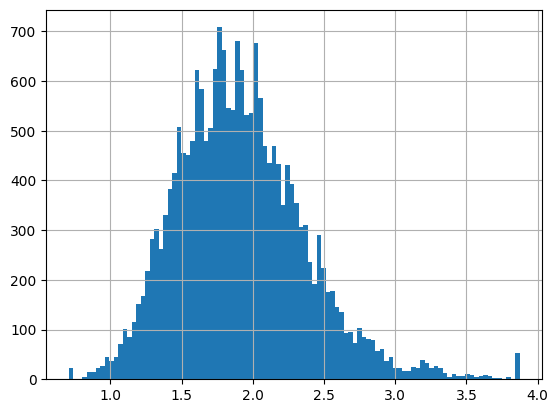

In [21]:
np.sqrt(data['MedInc']).hist(bins=100)

oraz logarytmicznej:

<Axes: >

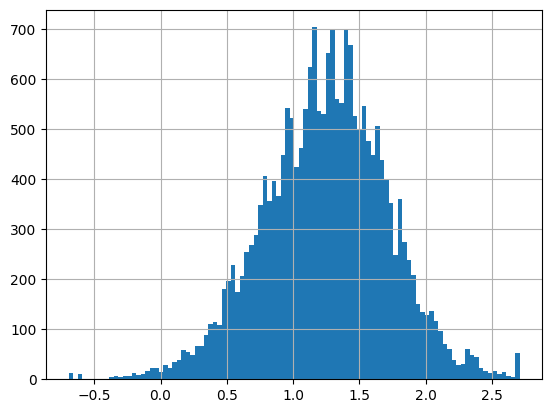

In [22]:
np.log(data['MedInc']).hist(bins=100)

### Inne przykłady transformacji, które mogą zapodziałać asymetrii

### 1. Reciprocal Transformation

Transformacja odwrotna polega na zamianie wartości cechy `X` na odwrotność ( $\frac{1}{X}$ ). Działa najlepiej na danych, które mają dodatnią asymetrię (skewness), czyli "długi ogon" po prawej stronie rozkładu.

**Formuła:**
$
X_{\text{transformed}} = \frac{1}{X}
$
Uwaga: wartość `X` nie może być równa 0, więc trzeba wcześniej odpowiednio przekształcić dane.


<Axes: >

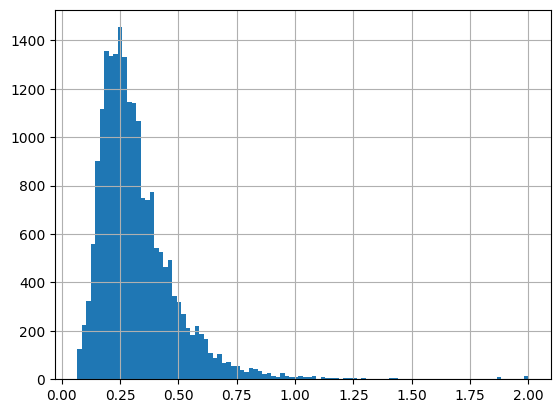

In [23]:
(1 / data['MedInc']).hist(bins=100)

### 2. Yeo-Johnson Transformation

Transformacja Yeo-Johnson jest rozszerzeniem Box-Cox, która może być stosowana na danych zarówno dodatnich, jak i ujemnych. Jest szczególnie przydatna, gdy dane zawierają wartości zero lub ujemne.

**Formuła Yeo-Johnson:**
Zmienna transformowana zależna od wartości ( X ), uwzględniając różne przypadki (dla $( X \geq 0 ) i ( X < 0 )$).


array([[<Axes: title={'center': '0'}>]], dtype=object)

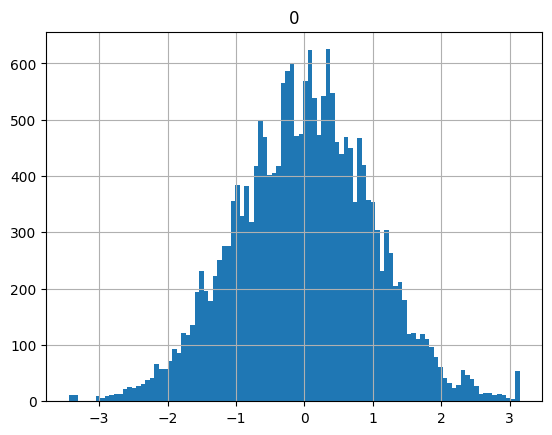

In [24]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
pd.DataFrame(pt.fit_transform(data['MedInc'].values.reshape(-1, 1))).hist(bins=100)

### 3. Box-Cox Transformation

Transformacja Box-Cox to specyficzny przypadek transformacji potęgowej, który działa tylko na danych dodatnich. Jej celem jest przekształcenie zmiennych o dodatniej asymetrii w bardziej symetryczne rozkłady.

**Formuła Box-Cox:**
$
X_{\text{transformed}} = \frac{X^{\lambda} - 1}{\lambda}
$
jeśli $( \lambda \neq 0 )$, w przeciwnym razie $( X_{\text{transformed}} = \ln(X) )$.


array([[<Axes: title={'center': '0'}>]], dtype=object)

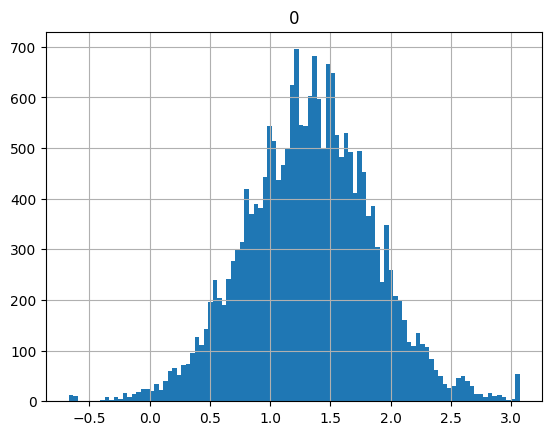

In [25]:
from scipy import stats

pd.DataFrame(stats.boxcox(data['MedInc'])[0]).hist(bins=100)

### 4. Winsorization

Winsoryzacja to metoda zmniejszania asymetrii danych poprzez ograniczenie skrajnych wartości (outliers). Zamiast obcinać wartości, zmienia się je na określone percentyle, co zmniejsza wpływ ekstremów.


array([[<Axes: title={'center': '0'}>]], dtype=object)

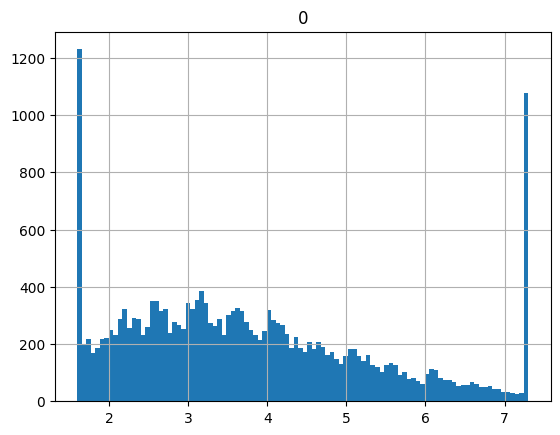

In [26]:
from scipy.stats import mstats

pd.DataFrame(mstats.winsorize(data['MedInc'], limits=[0.05, 0.05])).hist(bins=100)

### 5. Trimming (5-95 percentile)

Trimming polega na usunięciu pewnego procentu najbardziej skrajnych wartości z danych, co pomaga zredukować asymetrię, szczególnie w przypadku danych z dużą liczbą outliers.

<Axes: >

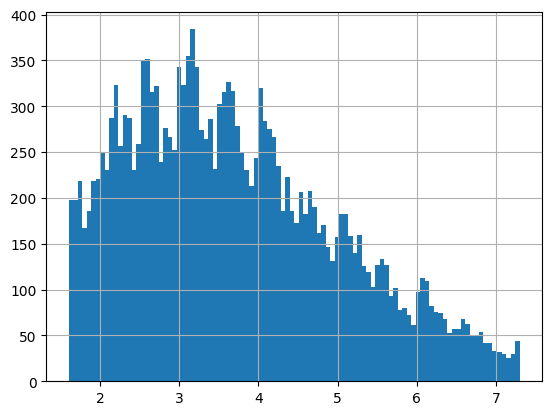

In [27]:
data['MedInc'][(data['MedInc'] >= np.percentile(data['MedInc'], 5)) & (data['MedInc'] <= np.percentile(data['MedInc'], 95))].hist(bins=100)

### 6. Reflect Transformation

W niektórych przypadkach można odwrócić asymetrię przez przekształcenie danych w taki sposób, że dane o ujemnej asymetrii stają się bardziej symetryczne, np. przez przekształcenie ich na postać \( -X \).

<Axes: >

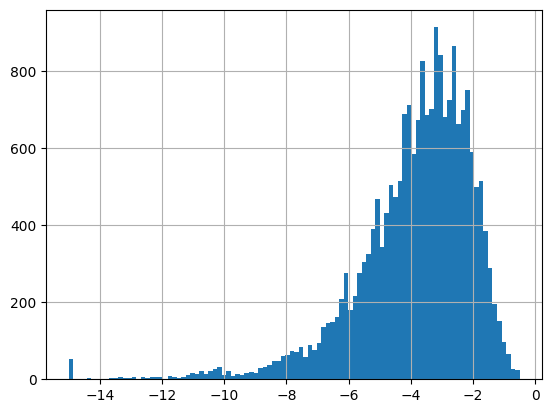

In [28]:
(-data['MedInc']).hist(bins=100)

## Zadania

1. Pobrać i wczytać zbiór danych danych dostępny pod adresem: https://archive.ics.uci.edu/dataset/10/automobile. Można już za pomocą python i biblioteki `ucimlrepo`.

2. Usunąć wiersze ze zbioru danych, w których występują wartości wybrakowane.

3. Dokonać zamiany wartości tekstowych na numeryczne przy użyciu dwóch poznanych metod, usuwając oryginalny atrybut.

4. Dla atrybutów numerycznych, których wartości prezentują lewo- lub prawoskośność, zastosować poznane metody poprawy symetrii. Można zastosować dowolne rozwiązania (nie tylko logarytm i pierwiastek), do uzyskania finalnego rozwiązania warto zastosować jedno rozwiązanie, które zapewnia najbardziej zauważalny efekt na histogramie wynikowym.

5. Dokonać normalizacji lub standaryzacji atrybutów numerycznych. Wartości w atrybutach numerycznych powinny w tym celu zostać zamienione na nowe (przetransformowane).